In [39]:
import pandas as pd 
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
!pip install mplfinance
import mplfinance as mpf

df = pd.read_csv("AAPL, 1D 01012007-12072023.csv")
df.head()


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [40]:
start_date = pd.to_datetime("2007-01-01")
df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='D')

In [41]:
print(df.head())

         volume    vwap    open   close    high     low        time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143  1167973200   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457  1168232400   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411  1168318800   

   transactions       Date  
0        189737 2007-01-01  
1        136333 2007-01-02  
2        141050 2007-01-03  
3        130547 2007-01-04  
4        569578 2007-01-05  


In [42]:
df.describe()

,volume,vwap,open,close,high,low,time,transactions,Date
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03,4159
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05,2012-09-10 00:00:00
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04,2007-01-01 00:00:00
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05,2009-11-05 12:00:00
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05,2012-09-10 00:00:00
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05,2015-07-16 12:00:00
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06,2018-05-21 00:00:00
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   float64       
 3   close         4159 non-null   float64       
 4   high          4159 non-null   float64       
 5   low           4159 non-null   float64       
 6   time          4159 non-null   int64         
 7   transactions  4159 non-null   int64         
 8   Date          4159 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 292.6 KB


In [44]:
print(df.columns)

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'Date'],
      dtype='object')


In [45]:
print(df.isnull().sum())

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
Date            0
dtype: int64


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   float64       
 3   close         4159 non-null   float64       
 4   high          4159 non-null   float64       
 5   low           4159 non-null   float64       
 6   time          4159 non-null   int64         
 7   transactions  4159 non-null   int64         
 8   Date          4159 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 292.6 KB
None


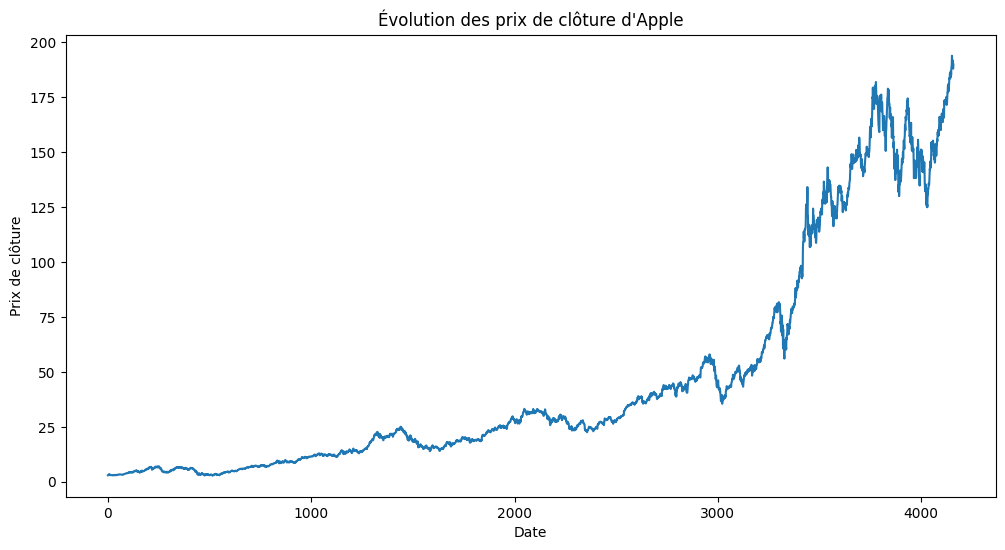

In [81]:
df['close'].plot(figsize=(12,6), title="Évolution des prix de clôture d'Apple", xlabel='Date', ylabel='Prix de clôture')
plt.show()

In [ ]:
# Ce graphique montre l'évolution du prix de clôture d'Apple sur la période du dataset.

# # Une tendance haussière indique une croissance du cours de l'action sur le long terme.

In [52]:
print(df[['close', 'volume']].describe())

             close        volume
count  4159.000000  4.159000e+03
mean     46.396058  3.662925e+08
std      50.293482  3.724793e+08
min       2.792900  2.422234e+07
25%      11.947150  1.067497e+08
50%      25.825000  2.136463e+08
75%      52.231250  4.965321e+08
max     193.970000  3.373042e+09


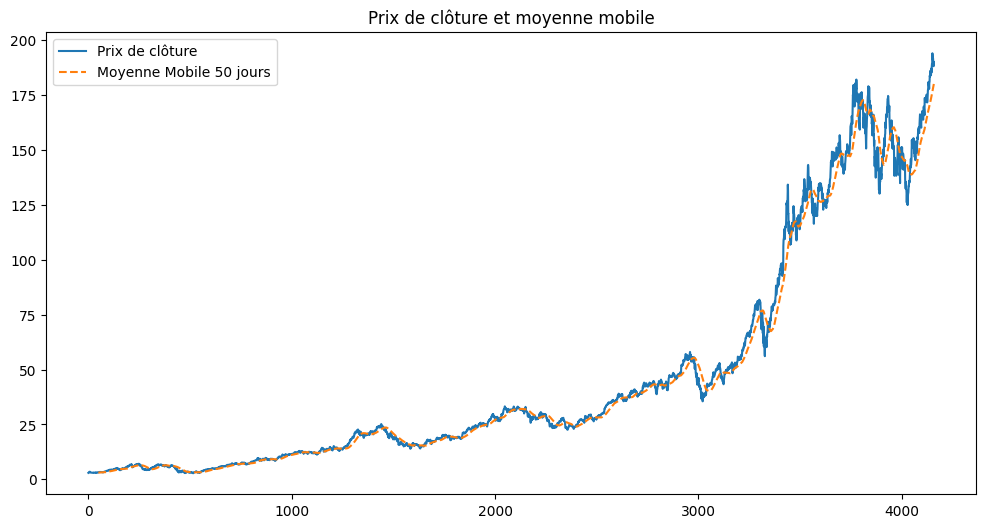

In [54]:
df['MA50'] = df['close'].rolling(window=50).mean()
plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Prix de clôture')
plt.plot(df['MA50'], label='Moyenne Mobile 50 jours', linestyle='dashed')
plt.legend()
plt.title('Prix de clôture et moyenne mobile')
plt.show()

In [ ]:
# La moyenne mobile sur 50 jours (MA50) permet de lisser les fluctuations court terme et de mieux voir la tendance du prix.

In [57]:
df['Daily Return'] = df['close'].pct_change()
stats.shapiro(df['Daily Return'].dropna())

ShapiroResult(statistic=np.float64(0.940666076855671), pvalue=np.float64(6.180858977992611e-38))

In [ ]:
# Si la p-valeur > 0.05, on ne rejette pas l'hypothèse de normalité (les rendements suivent une distribution normale).

In [59]:
data_2010_2015 = df.loc['2010-01-01':'2015-12-31', 'close']
data_2016_2021 = df.loc['2016-01-01':'2021-12-31', 'close']
t_stat, p_value = stats.ttest_ind(data_2010_2015, data_2016_2021, nan_policy='omit')
print(f'T-statistique: {t_stat}, P-valeur: {p_value}')

T-statistique: 0.16363853112177323, P-valeur: 0.8740742094518421


In [ ]:
#  la p-valeur < 0.05, cela signifie qu'il y a une différence statistiquement significative entre les prix moyens des deux périodes (hausse ou baisse significative du cours d’Apple).

In [61]:
correlation = np.corrcoef(df['close'], df['volume'])[0,1]
print(f'Corrélation entre le prix de clôture et le volume: {correlation}')

Corrélation entre le prix de clôture et le volume: -0.5174117560070657


In [ ]:
# corrélation proche de 0, il n'y a pas de relation significative entre volume et prix.